#CLIP (Contrastive Language–Image Pre-training)

Recuperación de imágenes y texto y clasificación sin ejemplos

Artículo: «Aprendizaje de modelos visuales transferibles a partir de la supervisión del lenguaje natural» (Radford et al., OpenAI, 2021).

https://youtu.be/BcfAkQagEWU?t=1077

![](https://raw.githubusercontent.com/GerardoMunoz/Vision/refs/heads/main/imgs/CLIP.png)

## Cuando usar clip
| tarea | cuando usar CLIP |
|---------------------------------|--------|
|**Clasificación sin ejemplos** | Compara una imagen con textos como «una foto de un gato», «una foto de un perro» y elige el texto más similar. |
| **Búsqueda de imágenes por texto** | Dado un texto, encuentra las imágenes más similares en el embedding. |
| **Búsqueda inversa (Imagen → Texto)** | Dada una imagen, encuentra descripciones o etiquetas relacionadas. |
| **Análisis semántico** | Mide la similitud entre dos conceptos (imagen o texto). |
| **Análisis visual / Recuperación multimodal** | Se utiliza como base para muchos modelos más grandes (p. ej., CLIP + LlaMA = LLaVA, GPT-4V). |

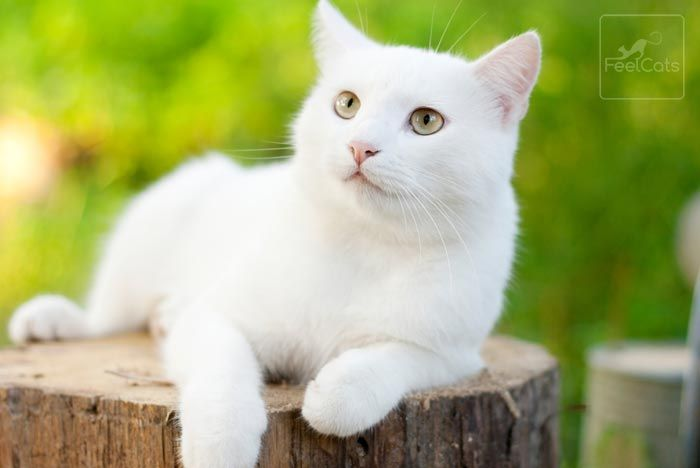

In [5]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import torch

# Cargar modelo y procesador
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Imagen de ejemplo
#url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png"
url = "mishi.jpg"
image = Image.open(url)
image


In [6]:
texts = ["una foto de un gato", "una foto de un perro", "una foto de un auto", "una foto de un elefante"]

inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Similaridad imagen-texto
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
for label, p in zip(texts, probs[0]):
    print(f"{label}: {p.item():.3f}")


una foto de un gato: 0.998
una foto de un perro: 0.002
una foto de un auto: 0.000
una foto de un elefante: 0.000


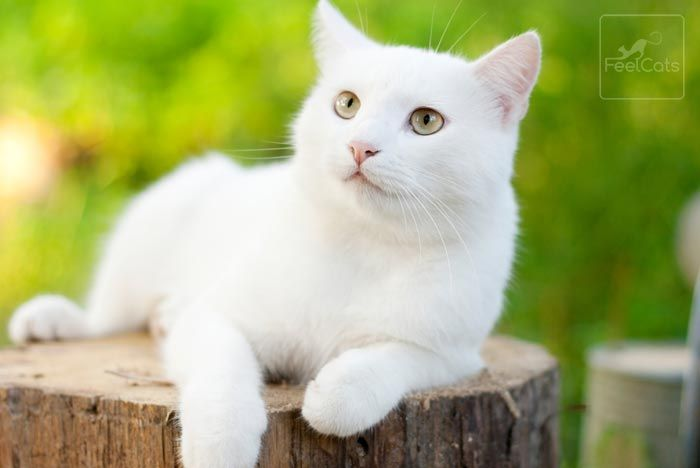

In [7]:
from PIL import Image
import requests
from io import BytesIO

url = "mishi.jpg"

#headers = {"User-Agent": "Mozilla/5.0"}  # Wikipedia exige un agente válido
#response = requests.get(url, headers=headers)

#response.raise_for_status()  # lanza error si no fue 200 OK

image = Image.open(url)
image


In [8]:
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Similaridad imagen-texto
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)
for label, p in zip(texts, probs[0]):
    print(f"{label}: {p.item():.3f}")

una foto de un gato: 0.998
una foto de un perro: 0.002
una foto de un auto: 0.000
una foto de un elefante: 0.000
